# 0. Run libraries and read summmary data
Existen 2 archivos csv que van a ser graficados.
1. Un resumen del total de fallecidos y vacunados por COVID-19 en el Perú, llamado **"epi_weeks.csv"**.
2. Y un resumen de fallecidos y tasa de mortalidad por departamentos del Perú llamado **"TOTAL_fallecidosXciudades.csv"**. Ambos en la carpeta **Data**.

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Summary 1
epi_df = pd.read_csv("Data/epi_weeks.csv")

# Add cumulative of deceased
epi_df['deceased_cum'] = epi_df['deceased'].cumsum()

# Add a new col of percentages of each row from any variable
def colPercent(dataset, new_name, col_name):
    dataset[new_name] = (dataset[col_name] / dataset[col_name].sum()) * 100

# Add the total percetange of deceaced and vaccinated to our data
colPercent(epi_df, "deceased_%", "deceased")
colPercent(epi_df, "vaccinated_%", "vaccinated")

print("Epidemiological week data in Perú (deceased and vaccinated):")
print(epi_df.head())

# Total of deceased and vaccinated
print("Total deceased: " + str(sum(epi_df["deceased"])))
print("Total vaccinated: " + str(sum(epi_df["vaccinated"])) + "\n")

# Summary 2
dep_df = pd.read_csv("Data/fallecidos_departamentos_semanasEpi.csv")

print("Total deceased in Perú departments:")
print(dep_df.head())

# Summary 3
vnd_xdep = pd.read_csv("Data/vac_fal_x_departamento.csv")

Epidemiological week data in Perú (deceased and vaccinated):
   epi_year  epi_week  deceased  vaccinated  deceased_cum  deceased_%  \
0      2020        10         2           0             2    0.000999   
1      2020        11         3           0             5    0.001498   
2      2020        12        30           0            35    0.014982   
3      2020        13        62           0            97    0.030962   
4      2020        14       223           0           320    0.111363   

   vaccinated_%  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
Total deceased: 200246
Total vaccinated: 34638125

Total deceased in Perú departments:
   Unnamed: 0  epi_year  epi_week  AMAZONAS  ANCASH  APURIMAC  AREQUIPA  \
0           0      2020        10         0       0         0         0   
1           1      2020        11         0       0         0         0   
2           2      2020        12         0       0         0         0   
3    

## TOTAL de fallecidos por COVID-19 por semana epidemiológica en Perú

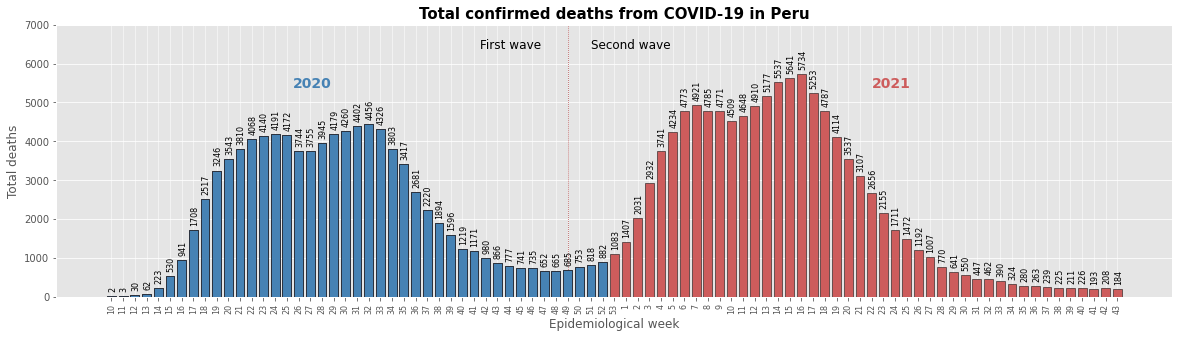

In [52]:
# Barplot of TOTAL DECEASED
def barplot_dec(df):

    # Create a figure
    plt.figure(figsize=(20, 5))

    # Using the style for the plot
    plt.style.use('ggplot')
    
    width = 0.75
    x = np.arange(len(df["epi_week"]))
    a = plt.bar(x, df["deceased"], width, color="indianred", edgecolor="black", zorder=2)  # Create bars
    plt.bar(np.arange(0,43), df["deceased"].iloc[0:43], width, color="steelblue", edgecolor="black", zorder=3) 
    
    plt.xticks(x, df["epi_week"], rotation = 90)  # Create names on the x-axis
    plt.yticks(np.arange(0, 7500, 1000))  # Range on y axis

    plt.title("Total confirmed deaths from COVID-19 in Peru", fontsize=15, weight="bold")
    plt.xlabel("Epidemiological week", fontsize=12)
    plt.ylabel("Total deaths", fontsize = 12)
    plt.tick_params(axis="x", labelsize = 8)

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2 +.09, 115 + height,
                    '%d' % int(height), ha='center', va='bottom',
                    rotation = 90, fontsize=8)
    autolabel(a)

    plt.text(15.5, 5375, r"2020", fontsize=14, color = "steelblue", weight="bold")
    plt.text(65, 5375, r"2021", fontsize=14, color="indianred", weight="bold")

    plt.text(31.5, 6375, r"First wave", fontsize=12)
    plt.text(41, 6375, r"Second wave", fontsize=12)

    # In week 49 start the new wave (01/12/2020)
    plt.axvline(x=39, color="brown", linestyle=":", linewidth=.75, zorder=1)  

    """ ax2 = plt.twinx()
    ax2.plot(x, epi_df['deceased_cum'], color='black', linestyle="-", linewidth=.75)
    ax2.set_ylim(0,210000,15000)
    ax2.set_ylabel('Cumulative confirmed COVID-19 deaths') """

    plt.grid(True, axis= "x", linewidth=.5, linestyle="-")  # Configure grid
    plt.rcParams["axes.axisbelow"] = True

    plt.show()

barplot_dec(epi_df)

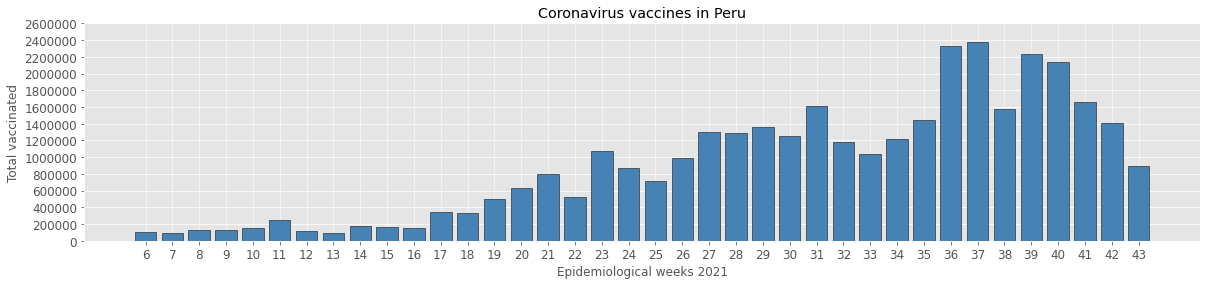

In [53]:
# Barplot of TOTAL VACCINATED
def barplot_vac(df):

    # Create a figure
    plt.figure(figsize=(20, 4))

    # Using the style for the plot
    plt.style.use('ggplot')

    y_position = np.arange(len(df["epi_week"].iloc[49:]))

    plt.tick_params(axis="x", labelsize=12)
    plt.tick_params(axis="y", labelsize=12)

    plt.bar(y_position, df["vaccinated"].iloc[49:], color="steelblue", edgecolor="black")  # Create bars
    plt.xticks(y_position, df["epi_week"].iloc[49:])  # Create names on the x-axis
    plt.yticks(np.arange(0, 2800000, 200000))
    plt.ticklabel_format(axis="y", style="plain")
    
    plt.title("Coronavirus vaccines in Peru")  # Labels
    plt.xlabel("Epidemiological weeks 2021")
    plt.ylabel("Total vaccinated")

    plt.grid(True, axis= "x", linewidth=.5, linestyle="-")  # Configure grid
    plt.rcParams["axes.axisbelow"] = True
    """
    # vacunatones
    plt.axvline(x=22, color="blue", linestyle=":", linewidth=1, ymax=.92)
    plt.axvline(x=23, color="blue", linestyle=":", linewidth=1, ymax=.92)
    plt.axvline(x=24, color="blue", linestyle=":", linewidth=1, ymax=.92)
    plt.axvline(x=26, color="blue", linestyle=":", linewidth=1, ymax=.92)
    plt.axvline(x=28, color="blue", linestyle=":", linewidth=1, ymax=.92)
    plt.axvline(x=29, color="blue", linestyle=":", linewidth=1, ymax=.92)
    plt.axvline(x=30, color="blue", linestyle=":", linewidth=1, ymax=.92)
    plt.axvline(x=31, color="blue", linestyle=":", linewidth=1, ymax=.92)

    plt.text(21.86, 2450000, r"1", fontsize=11)
    plt.text(22.86, 2450000, r"2", fontsize=11)
    plt.text(23.86, 2450000, r"3", fontsize=11)
    plt.text(25.86, 2450000, r"4", fontsize=11)
    plt.text(27.86, 2450000, r"5", fontsize=11)
    plt.text(28.86, 2450000, r"6", fontsize=11)
    plt.text(29.86, 2450000, r"7", fontsize=11)
    plt.text(30.86, 2450000, r"8", fontsize=11) 
    
    plt.text(17, 2450000, r"Vacunatones ->", fontsize=11)"""

    plt.show()

barplot_vac(epi_df)

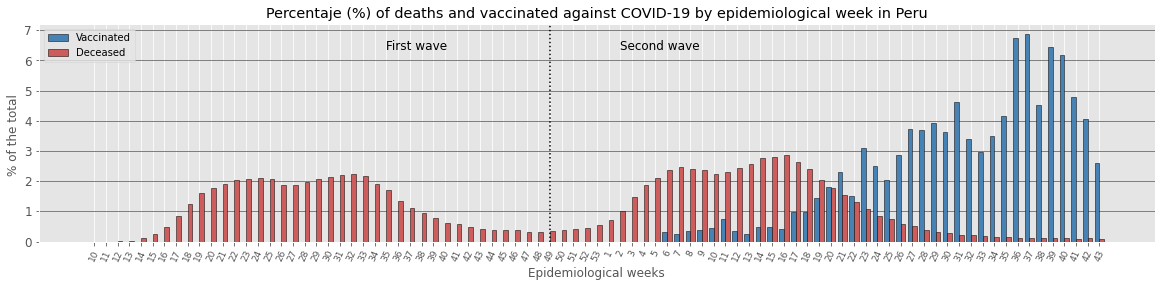

In [259]:
def barplot_epi(df):
       
       # Create a figure
       plt.figure(figsize=(20, 4))

       # Using the style for the plot
       plt.style.use('ggplot')

       x = np.arange(len(df['epi_week']))
       width = 0.40  # the width of the bars
       
       plt.bar(x - width/2, df['vaccinated_%'], width, label='Vaccinated', color = 'steelblue', edgecolor='black')
       plt.bar(x + width/2, df['deceased_%'], width, label='Deceased', color = 'indianred', edgecolor='black')
       
       # Add some text for labels, title and custom x-axis tick labels, etc.
       plt.ylabel('% of the total ')
       plt.xlabel('Epidemiological weeks')
       plt.title('Percentaje (%) of deaths and vaccinated against COVID-19 by epidemiological week in Peru')
       plt.xticks(x, df["epi_week"], rotation = 65)  # Create names on the x-axis

       plt.legend()
       plt.tick_params(axis='x', labelsize=9)
       plt.tick_params(axis='y', labelsize=12)

       plt.grid(True, axis = 'y', color = "grey", linewidth = "1", linestyle = "-")
       plt.rcParams['axes.axisbelow'] = True
       
       # Plot line (01/12/2020 week 49, 2nd wave)
       plt.axvline(x=39, color='black', linestyle='dotted', linewidth=1.5)

       # Plot text
       plt.text(25, 6.35, r'First wave', fontsize=12)
       plt.text(45, 6.35, r'Second wave', fontsize=12)

       # Plot
       plt.show()
       
       
barplot_epi(epi_df)

In [101]:
def barplot_dep(df):
     
    
    # Create a figure
    plt.figure(figsize=(10, 10))

    # Using the style for the plot
    plt.style.use('ggplot')

    # Create y positions
    y_pos = np.arange(len(df["DEPARTAMENTO"]))
    df = df.sort_values(by=["tasa_mortalidad"])
    # Create bars
    bh = plt.barh(y_pos, df["tasa_mortalidad"], color="silver", edgecolor="black")

    # Create names on the x-axis
    plt.xticks(np.arange(0, 1, 0.05),rotation = -45)
    plt.yticks(y_pos, df["DEPARTAMENTO"], fontsize=12)

    # Labels
    plt.title("Deaths from COVID-19 by departments of Peru", fontsize=12)
    plt.xlabel("Mortality rate (per 100 inhabitants)", fontsize=12)
    plt.tick_params(axis="x", labelsize=12)
    plt.text(0.62, 13, r"Overall mortality rate", fontsize=12)
    plt.text(0.67, 12, r"in Peru (0.61)", fontsize=12)

    # 01/12/2020 en semana 49 empieza la segunda ola
    plt.axvline(x=0.6123714780640244, color="black", linestyle="dashed", linewidth=1)

    # Configure grid
    plt.grid(True, axis="x", color="grey", linewidth="1", linestyle="-")
    plt.rcParams["axes.axisbelow"] = True
    bh[18].set_color("r")
   

    # Show graphic
    plt.show()

barplot_dep(dep_df)

KeyError: 'DEPARTAMENTO'

<Figure size 1000x1000 with 0 Axes>